# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [26]:
### Loading necessary library for the model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [2]:
Election_Data = pd.read_excel(r'C:\Users\vicky\Document\Election_Data.xlsx', sheet_name="Election_Dataset_Two Classes")

In [29]:
# Checking the head in dataset
Election_Data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [30]:
# Checking the tail in dataset
Election_Data.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [31]:
# Checking the shape of the data 
print("Number of rows: ",Election_Data.shape[0],"\n ""Number  of columns: ",Election_Data.shape[1])

Number of rows:  1525 
 Number  of columns:  10


In [32]:
# Checking the info of the data
Election_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


From above We have int and object data types in the data.

There are total of 10 variables present in the dataset.

There is 2 categorical variables and 8 Numerical variables are present in the datasets.

In [33]:
# To drop the value "Unnamed: 0"
Election_Data=Election_Data.drop('Unnamed: 0',axis=1)

In [34]:
Election_Data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


As per above output seen that the "Unnamed:0" is a variable that simply represents the index in the data. Hence, it should be dropped as it is no use in the model.

In [61]:
# Checking the info of the data
Election_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


There are total of 10 variables present in the dataset.

There is 2 categorical variables and 7 Numerical variables are present in the datasets.

In [62]:
# Checking the Null value in the dataset
Election_Data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

As per the above output we seen that there is no null values are present in dataset.

In [63]:
# Checking the data types in the datasets
Election_Data.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [64]:
# Check the data description 
Election_Data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Check the count of the datasets.
Election_Data.vote.value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [66]:
# Checking the duplicates value in the data
dups=Election_Data.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
Election_Data[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


From above output we see that there is 8 duplicate value are present in the datasets. And we cannot clearly say that this is the same person or different. So, we will not remove the duplicate value in this scenario.

In [67]:
# Checking the unique values in the categorical data
for feature in Election_Data.columns:
    if Election_Data[feature].dtype=='object':
           print(feature.upper() ," ",Election_Data[feature].nunique())
           print(Election_Data[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


In [68]:
# Checking the Skew in the data
Election_Data.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

From the above output we see that the only two variables are positively skewed and the rest variables are negatively skewed with max skewedness in blair.

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

# Univariate Analysis

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

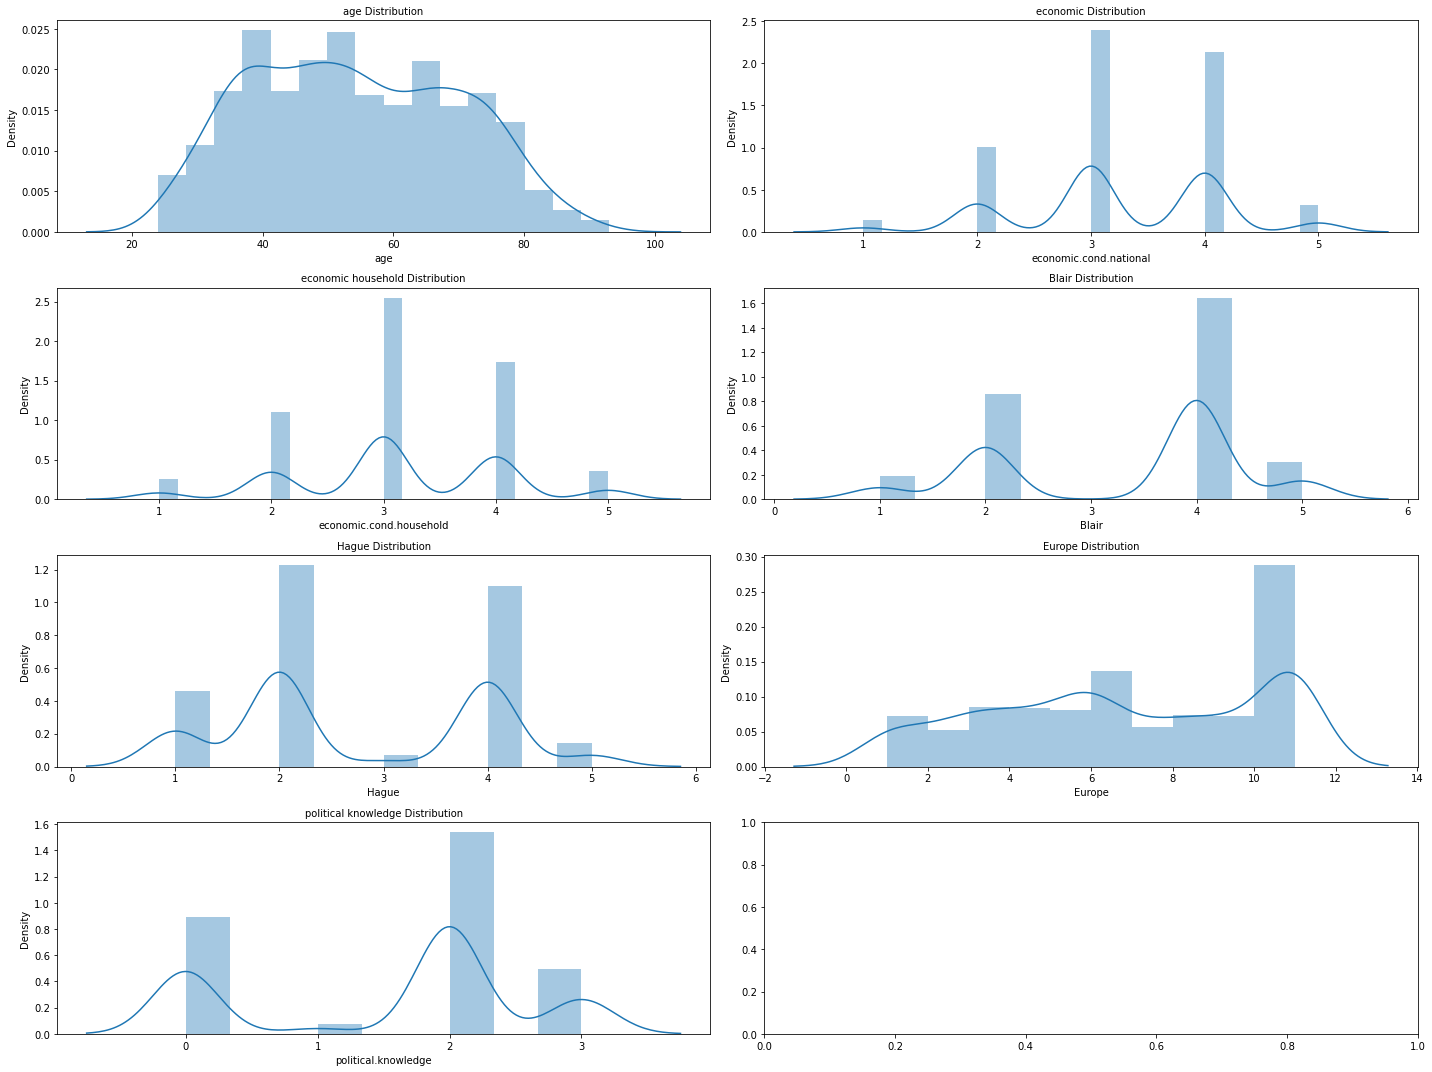

In [50]:
# Distplot to check Distribution and Density of each Variables
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
a = sns.distplot(Election_Data['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a=sns.distplot(Election_Data['economic.cond.national'], ax=axes[0][1])
a.set_title("economic Distribution",fontsize=10)

a=sns.distplot(Election_Data['economic.cond.household'], ax=axes[1][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.distplot(Election_Data['Blair'], ax=axes[1][1])
a.set_title("Blair Distribution",fontsize=10)

a = sns.distplot(Election_Data['Hague'] , ax=axes[2][0])
a.set_title("Hague Distribution",fontsize=10)

a=sns.distplot(Election_Data['Europe'], ax=axes[2][1])
a.set_title("Europe Distribution",fontsize=10)

a=sns.distplot(Election_Data['political.knowledge'], ax=axes[3][0])
a.set_title("political knowledge Distribution",fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

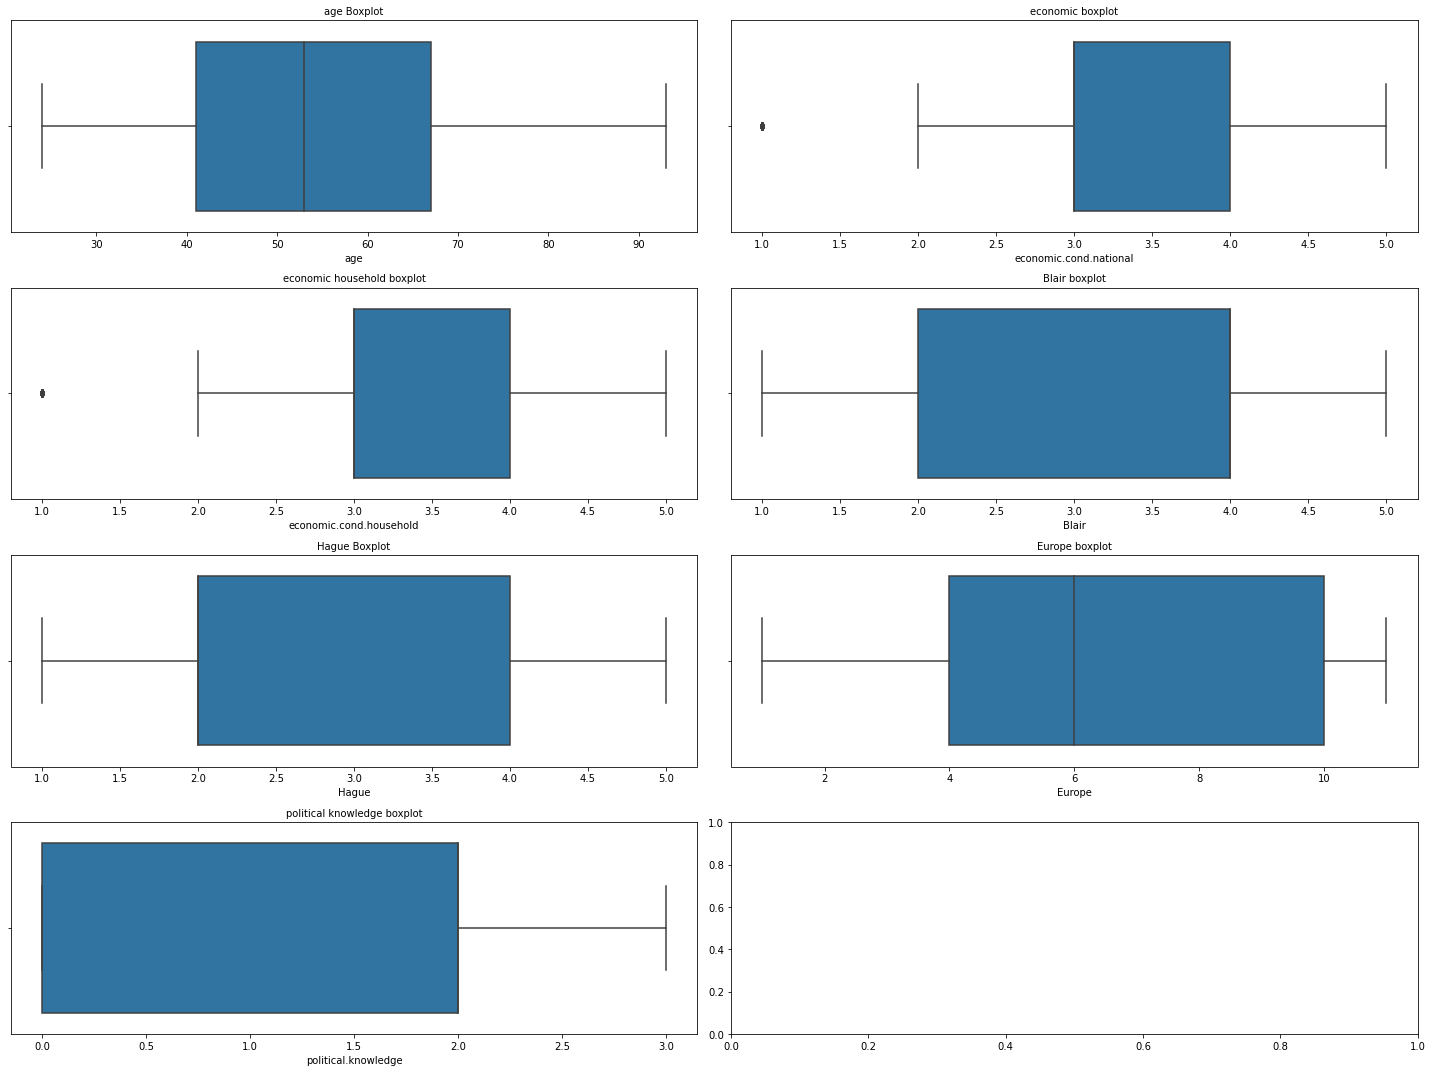

In [52]:
# Boxplot for checking presence of outliers in each feature or Univariate Analysis of all variables
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
a = sns.boxplot(Election_Data['age'] , orient = "v" , ax=axes[0][0])
a.set_title("age Boxplot",fontsize=10)

a=sns.boxplot(Election_Data['economic.cond.national'],orient="v", ax=axes[0][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.boxplot(Election_Data['economic.cond.household'],orient="v", ax=axes[1][0])
a.set_title("economic household boxplot", fontsize=10)

a=sns.boxplot(Election_Data['Blair'],orient="v", ax=axes[1][1])
a.set_title("Blair boxplot", fontsize=10)

a = sns.boxplot(Election_Data['Hague'] , orient = "v" , ax=axes[2][0])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.boxplot(Election_Data['Europe'],orient="v", ax=axes[2][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.boxplot(Election_Data['political.knowledge'],orient="v", ax=axes[3][0])
a.set_title("political knowledge boxplot", fontsize=10)
plt.tight_layout()
plt.show()

# Bivariate Analysis

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


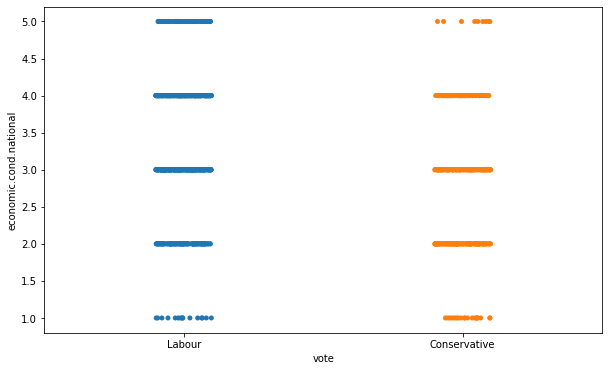

In [58]:
# Checking the stripplot between vote and economic.cond.national
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['economic.cond.national'], jitter=True) 
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


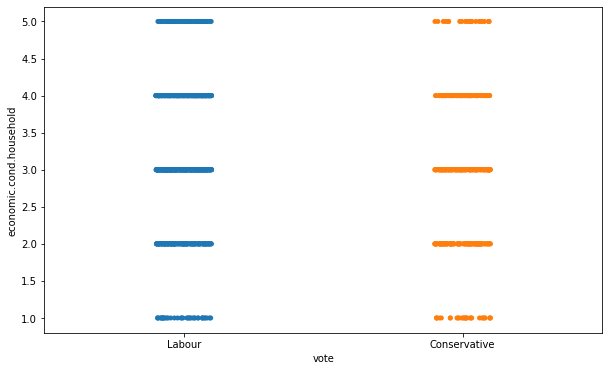

In [57]:
# Checking the stripplot between vote and economic.cond.household
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['economic.cond.household'], jitter=True) 
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


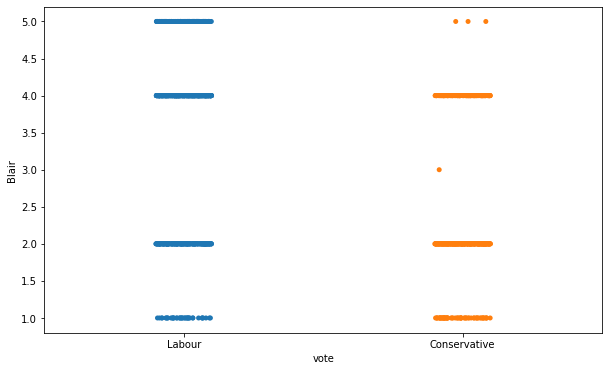

In [60]:
# Checking the stripplot between vote and Blair
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['Blair'], jitter=True) 
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


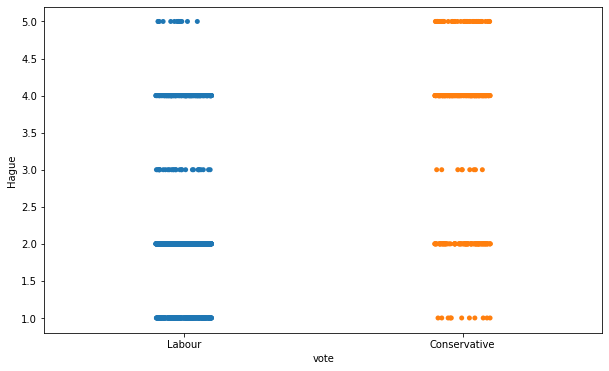

In [62]:
# Checking the stripplot between vote and Hague
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['Hague'], jitter=True) 
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


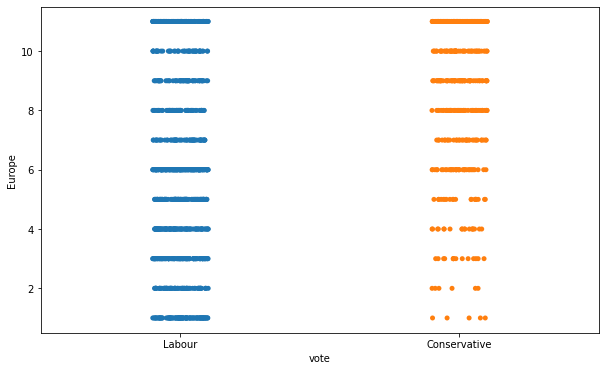

In [63]:
# Checking the stripplot between vote and Europe
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['Europe'], jitter=True) 
plt.show()

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


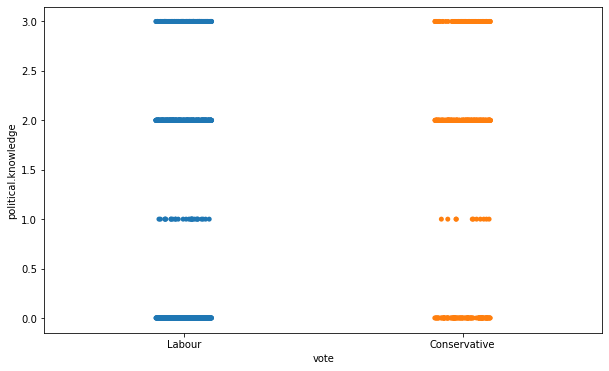

In [64]:
# Checking the stripplot between vote and political.knowledge
plt.figure(figsize=(10,6))
sns.stripplot(Election_Data["vote"], Election_Data['political.knowledge'], jitter=True) 
plt.show()

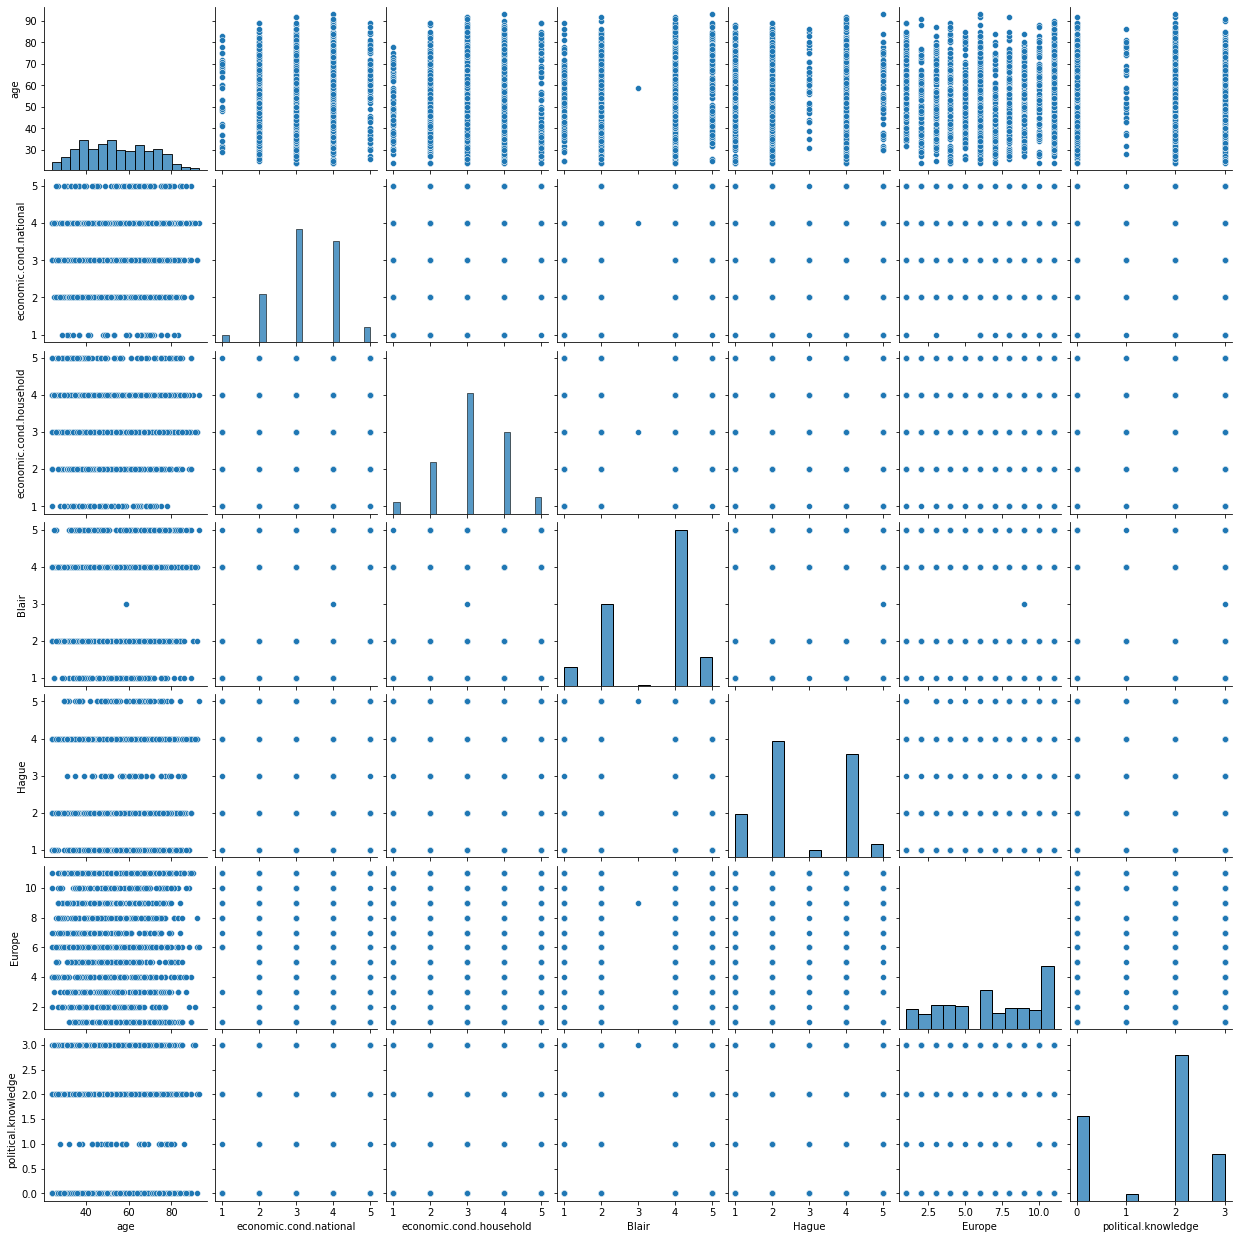

In [65]:
# Checking the data distribution
sns.pairplot(Election_Data)

CORRELATION MATRIX

<AxesSubplot:>

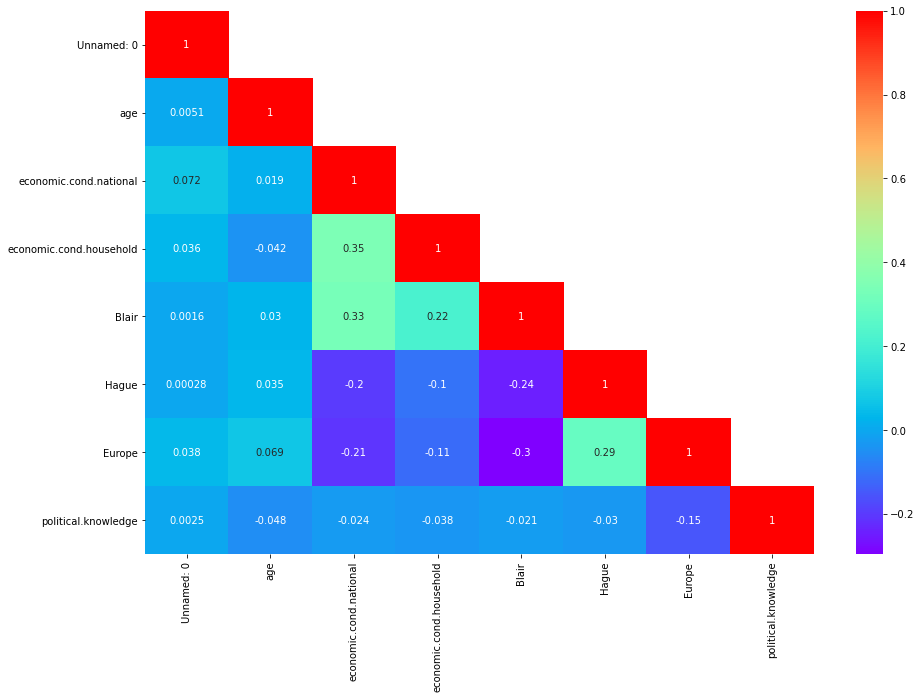

In [483]:
plt.figure(figsize=(15,10))
sns.heatmap(Election_Data.corr(),annot=True, cmap='rainbow', mask=np.triu(Election_Data.corr(),+1))

Multicollinearity is an important issue which can harm the model. Heatmap is a good way of identifying this issue. It gives us a basic idea of relationship the variables have with each other.

Outlier Checks

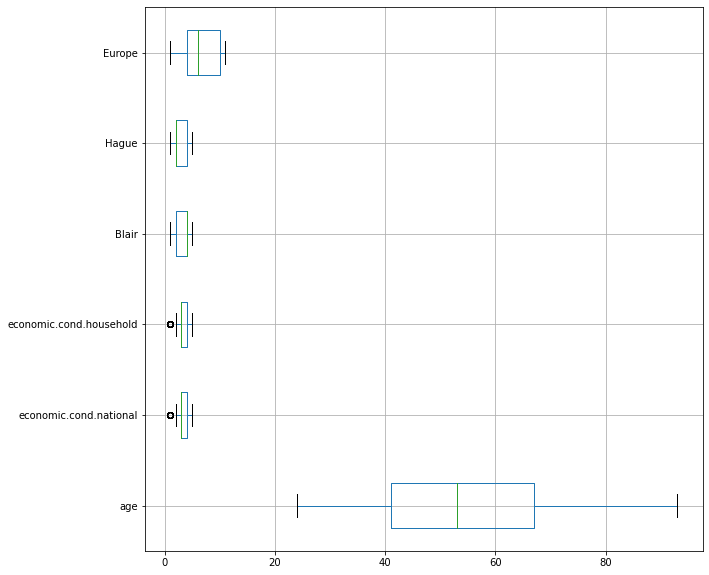

In [71]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
Election_Data.iloc[:,:7].boxplot(vert=0)
plt.show()

There are outliers present in "economic.cond.household" & "economic.cond.national" variables that can be seen from the boxplots.

outlier treatment

In [72]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [73]:
for column in Election_Data.iloc[:, 1:7].columns:
    lr,ur=remove_outlier(Election_Data[column])
    Election_Data[column]=np.where(Election_Data[column]>ur,ur,Election_Data[column])
    Election_Data[column]=np.where(Election_Data[column]<lr,lr,Election_Data[column])

<AxesSubplot:>

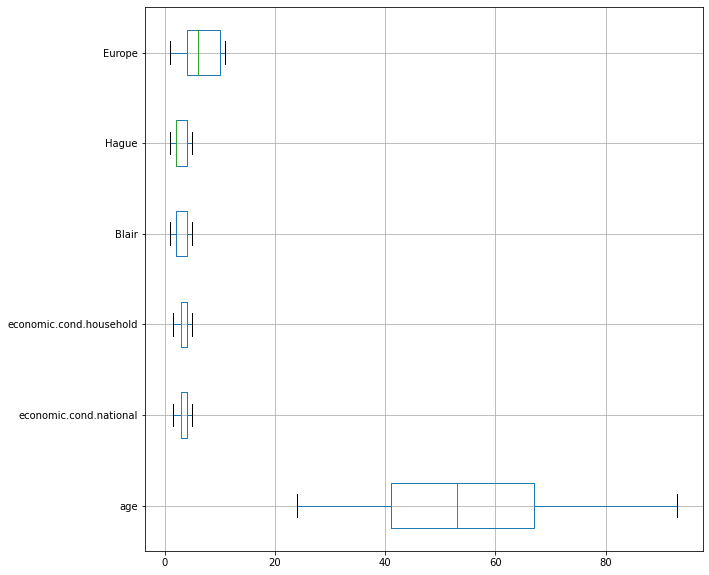

In [74]:
plt.figure(figsize=(10,10))
Election_Data.iloc[:, 0:7].boxplot(vert=0)

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [5]:
cat1 = ['vote', 'gender']

In [6]:
# Converting categorical to dummy variables in data
Election_Data =pd.get_dummies(Election_Data, columns=cat1,drop_first=True)

In [7]:
Election_Data.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,1,43,3,3,4,1,2,2,1,0
1,2,36,4,4,4,4,5,2,1,1
2,3,35,4,4,5,2,3,2,1,1
3,4,24,4,2,2,1,4,0,1,0
4,5,41,2,2,1,1,6,2,1,1


Variables Vote and Gender are object datatype. We need to convert them to integer datatype to perform operations.

For encoding we use replace function to convert the categorical string value to categorical numeric values.

From above we see that the Vote has 2 variables: Conservative and Labour. To convert them into Conservative to 0 and the Labour to 1, we use Replace function.
 
From above we can also see that the Gender also has 2 variables. To convert them into 0 and 1, we use replace function.

Train/Test split

In [8]:
X = Election_Data.drop('vote_Labour', axis=1)
 
y = Election_Data.pop('vote_Labour')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [10]:
X.head()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,2,36,4,4,4,4,5,2,1
2,3,35,4,4,5,2,3,2,1
3,4,24,4,2,2,1,4,0,0
4,5,41,2,2,1,1,6,2,1


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

Data split is performed to split the data in the ratio 70.30.

Test data is 70% and Train data is 30%.

Scaling:
    
    Scaling is not required.

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

# Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [40]:
## Performance Matrix on train data set
y_train_predict=model.predict(X_train)
model_score=model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Model Evaluation

In [41]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8406747891283973

In [42]:
## Performance Matrix on train data set
y_test_predict= model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Model Evaluation

In [43]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8231441048034934

# Discriminant Analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
# Fit the Linear Discriminant Analysis model
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [46]:
## Performance Matrix on train data set

In [47]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



Model Evaluation

In [48]:
# Accuracy - Training Data
LDA_model.score(X_train, y_train)

0.8369259606373008

In [49]:
## Performance Matrix on test data set
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Model Evaluation

In [50]:
# Accuracy - Training Data
LDA_model.score(X_test, y_test)

0.8187772925764192

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# Naive Bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [52]:
# Fit the Naive Bayes model
NBM_model=GaussianNB()
NBM_model.fit(X_train, y_train)

GaussianNB()

In [53]:
## Performance Matrix on train data set
y_train_predict = NBM_model.predict(X_train)
model_score = NBM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



Model Evaluation

In [56]:
# Accuracy - Training Data
NBM_model.score(X_train, y_train)

0.8331771321462043

In [58]:
## Performance Matrix on test data set
y_test_predict = NBM_model.predict(X_test)
model_score = NBM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Model Evaluation

In [59]:
# Accuracy - Test Data
NBM_model.score(X_test, y_test)

0.8253275109170306

# KNN Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNeighbors Classifier model
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8537956888472352
[[242  90]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



Model Evaluation

In [62]:
# Accuracy - Training Data
KNN_model.score(X_train, y_train)

0.8537956888472352

In [63]:
## Performance Matrix on test data set
y_test_predict=KNN_model.predict(X_test)
model_score=KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



Model Evaluation

In [64]:
# Accuracy - Test Data
KNN_model.score(X_test, y_test)

0.7860262008733624

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

# Model Tuning

In [65]:
from sklearn import tree

# Fit the Decision Tree Classifier model
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



Model Evaluation

In [67]:
# Accuracy - Train Data
DT_model.score(X_train, y_train)

0.9990627928772259

In [68]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.759825327510917
[[ 83  47]
 [ 63 265]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       130
           1       0.85      0.81      0.83       328

    accuracy                           0.76       458
   macro avg       0.71      0.72      0.71       458
weighted avg       0.77      0.76      0.76       458



Model Evaluation

In [69]:
# Accuracy - Test Data
DT_model.score(X_test, y_test)

0.759825327510917

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest Classifier model
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [71]:
## Performance Matrix on train data set

In [72]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



Model Evaluation

In [73]:
# Accuracy - Train Data
RF_model.score(X_train, y_train)

0.9990627928772259

In [74]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Model Evaluation

In [75]:
# Accuracy - Test Data
RF_model.score(X_test, y_test)

0.8209606986899564

# Bagging

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Fit the Bagging Classifier model
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [77]:
## Performance Matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
model_score=Bagging_model.score(X_train,y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



Model Evaluation

In [78]:
# Accuracy - Train Data
Bagging_model.score(X_train, y_train)

0.9990627928772259

In [79]:
## Performance Matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
model_score=Bagging_model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.7969432314410481
[[ 83  47]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



Model Evaluation

In [80]:
# Accuracy - Test Data
Bagging_model.score(X_test, y_test)

0.7969432314410481

# Ada Boost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

# Fit the Ada Boost Classifier model
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [82]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



Model Evaluation

In [83]:
# Accuracy - Train Data
ADB_model.score(X_train, y_train)

0.8472352389878163

In [84]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Model Evaluation

In [85]:
# Accuracy - Test Data
ADB_model.score(X_test, y_test)

0.8187772925764192

# Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit the Gradient Boosting Classifier model
gbcl_model = GradientBoostingClassifier(random_state=1)
gbcl_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [87]:
## Performance Matrix on train data set
y_train_predict = gbcl_model.predict(X_train)
model_score = gbcl_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



Model Evaluation

In [88]:
# Accuracy - Train Data
gbcl_model.score(X_train, y_train)

0.8865979381443299

In [89]:
## Performance Matrix on test data set
y_test_predict = gbcl_model.predict(X_test)
model_score = gbcl_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



Model Evaluation

In [90]:
# Accuracy - Test Data
gbcl_model.score(X_test, y_test)

0.8318777292576419

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

# Logistic Regression

AUC ROC curve for Logistic Regression Train

AUC: 0.889


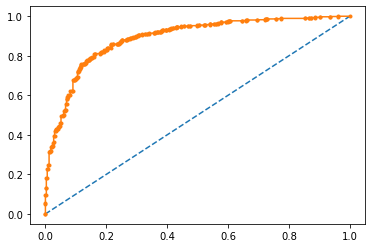

In [91]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LR_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LR_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr, LR_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



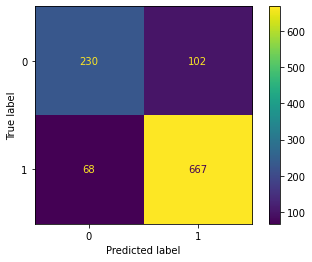

In [92]:
# Confusion matrix on the training data

plot_confusion_matrix(model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC curve for Logistic Regression Test

AUC: 0.882


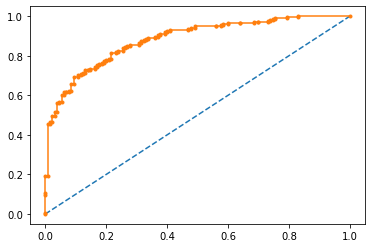

In [93]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LRT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LRT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LRT_fpr, LRT_tpr, LRT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LRT_fpr, LRT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



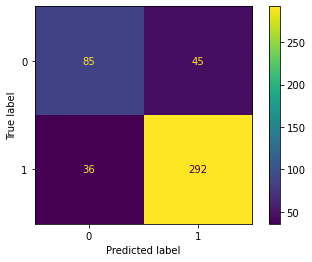

In [94]:
# Confusion matrix on the test data

plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Discriminant Analysis

AUC ROC curve for LDA Train

AUC: 0.889


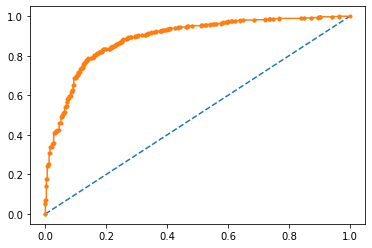

In [95]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LDA_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % LDA_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LDA_fpr, LDA_tpr, LDA_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr, LDA_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



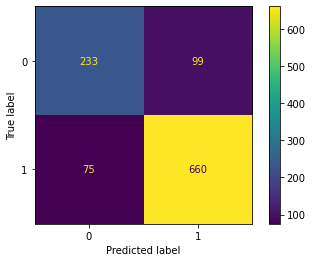

In [96]:
# Confusion matrix on the training data

plot_confusion_matrix(LDA_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC curve for LDA Test

AUC: 0.884


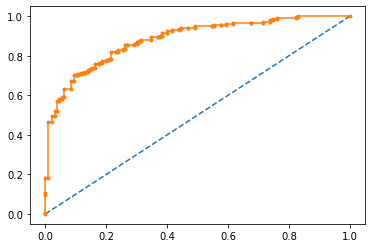

In [97]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
LDAT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDAT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
LDAT_fpr, LDAT_tpr, LDAT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDAT_fpr, LDAT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



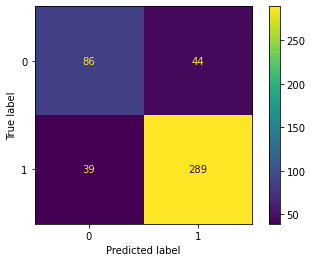

In [98]:
# Confusion matrix on the test data

plot_confusion_matrix(LDA_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Naive Bayes Model

AUC ROC Curve NB Train

AUC: 0.886


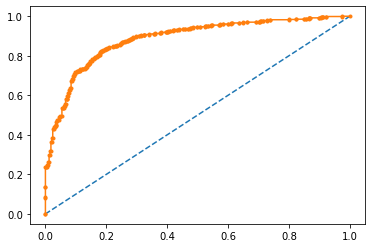

In [99]:
# predict probabilities
probs = NBM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NBM_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NBM_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
NBM_fpr, NBM_tpr, NBM_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NBM_fpr, NBM_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



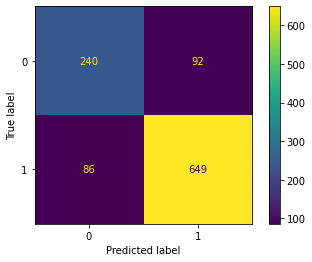

In [100]:
# Confusion matrix on the training data

plot_confusion_matrix(NBM_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC Curve NB Test

AUC: 0.885


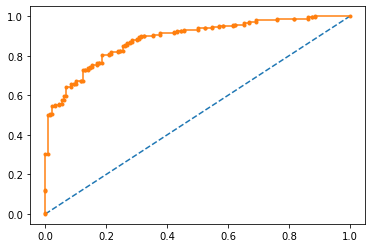

In [101]:
# predict probabilities
probs = NBM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NBMT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NBMT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
NBMT_fpr, NBMT_tpr, NBMT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NBMT_fpr, NBMT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



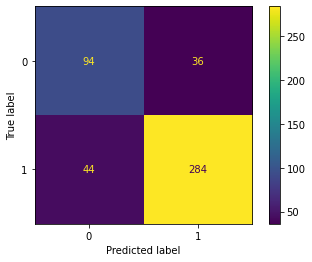

In [102]:
# Confusion matrix on the test data

plot_confusion_matrix(NBM_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# KNN Model

AUC ROC Curve KNN Train

AUC: 0.921


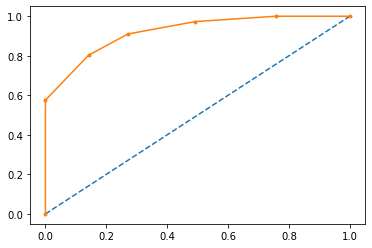

In [103]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
KNN_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_fpr, KNN_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



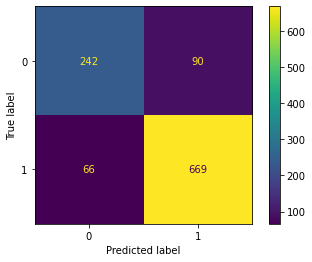

In [104]:
# Confusion matrix on the training data

plot_confusion_matrix(KNN_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC Curve KNN Test

AUC: 0.835


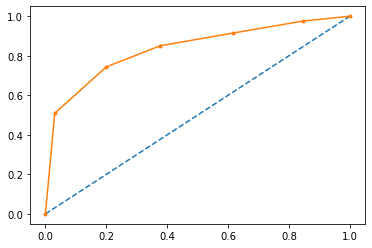

In [105]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
KNNT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNNT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
KNNT_fpr, KNNT_tpr, KNNT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNNT_fpr, KNNT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



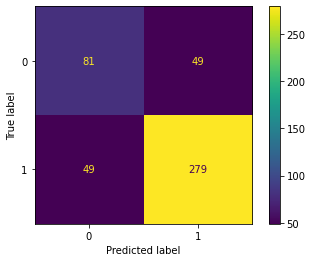

In [106]:
# Confusion matrix on the test data

plot_confusion_matrix(KNN_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Decision Tree

AUC ROC Curve DT Train

AUC: 1.000


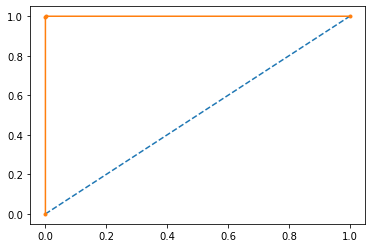

In [107]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
DT_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % DT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
DT_fpr, DT_tpr, DT_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_fpr, DT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



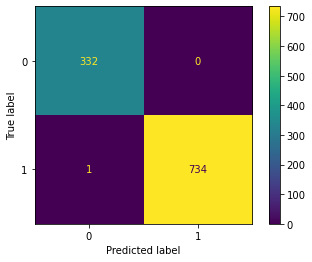

In [108]:
# Confusion matrix on the training data

plot_confusion_matrix(DT_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC Curve DT Test

AUC: 0.723


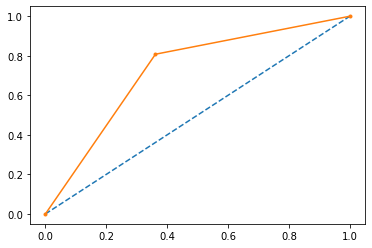

In [109]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
DTT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DTT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
DTT_fpr, DTT_tpr, DTT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DTT_fpr, DTT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



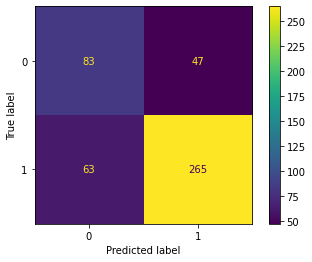

In [110]:
# Confusion matrix on the test data

plot_confusion_matrix(DT_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Random Forest

AUC ROC Curve RF Train

AUC: 1.000


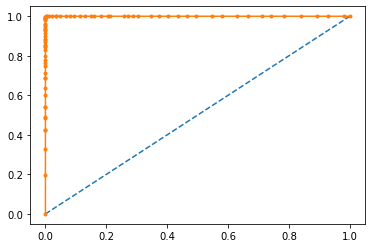

In [111]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RF_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RF_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_fpr, RF_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



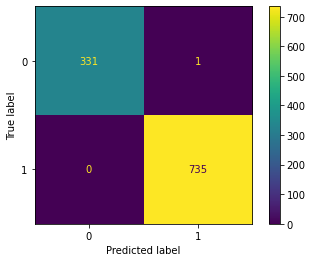

In [112]:
# Confusion matrix on the training data

plot_confusion_matrix(RF_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC ROC Curve RF Test

AUC: 0.887


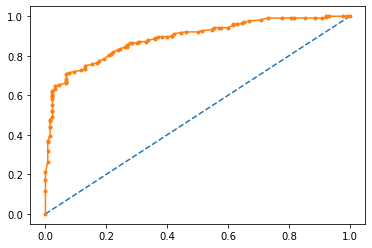

In [113]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RFT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
RFT_fpr, RFT_tpr, RFT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RFT_fpr, RFT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



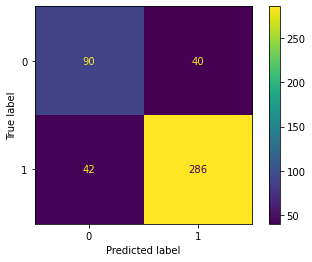

In [114]:
# Confusion matrix on the test data

plot_confusion_matrix(RF_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Bagging

AUC _ROC Curve Bagging Train

AUC: 1.000


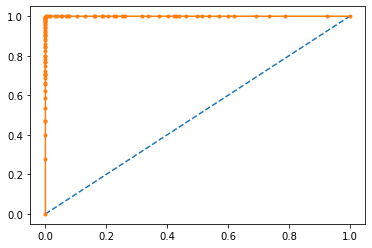

In [115]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
Bagging_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Bagging_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
Bagging_fpr, Bagging_tpr, Bagging_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Bagging_fpr, Bagging_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



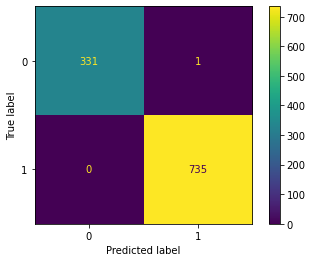

In [116]:
# Confusion matrix on the training data

plot_confusion_matrix(Bagging_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC _ROC Curve Bagging Test

AUC: 0.877


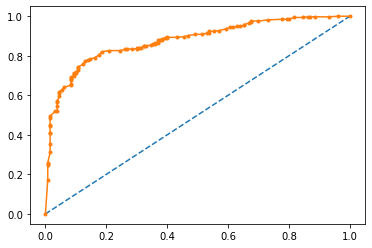

In [117]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
BaggingT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % BaggingT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
BaggingT_fpr, BaggingT_tpr, BaggingT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(BaggingT_fpr, BaggingT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



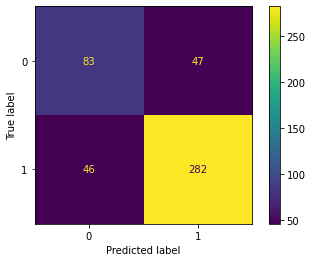

In [118]:
# Confusion matrix on the test data

plot_confusion_matrix(Bagging_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Ada Boost

AUC _ROC Curve Boosting Train

AUC: 0.913


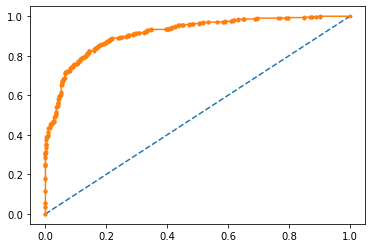

In [119]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ADB_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ADB_fpr, ADB_tpr, ADB_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_fpr, ADB_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



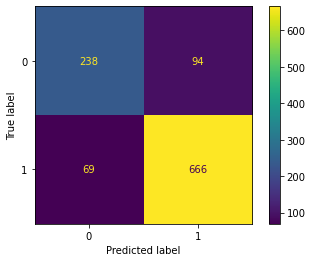

In [120]:
# Confusion matrix on the training data

plot_confusion_matrix(ADB_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

AUC _ROC Curve Boosting Test

AUC: 0.879


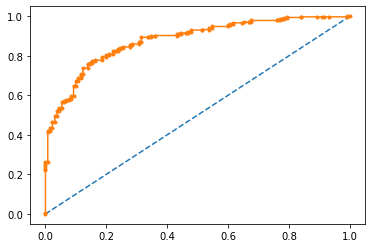

In [121]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ADBT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADBT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ADBT_fpr, ADBT_tpr, ADBT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADBT_fpr, ADBT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



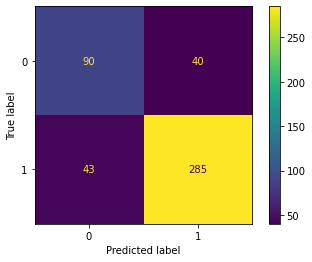

In [122]:
# Confusion matrix on the test data

plot_confusion_matrix(ADB_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

# Gradient Boosting

Gradient Boosting AUC_ROC Curve Train

AUC: 0.950


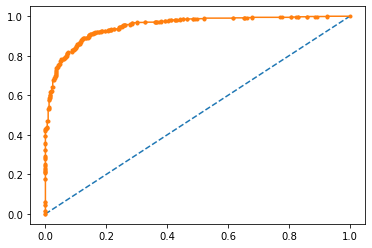

In [123]:
# predict probabilities
probs = gbcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbcl_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
gbcl_fpr, gbcl_tpr, gbcl_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_fpr, gbcl_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



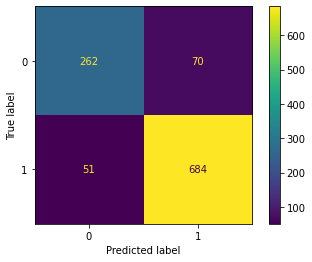

In [124]:
# Confusion matrix on the training data

plot_confusion_matrix(gbcl_model,X_train,y_train)
print(classification_report(y_train, y_train_predict),'\n');

Gradient Boosting AUC_ROC Curve Test

AUC: 0.904


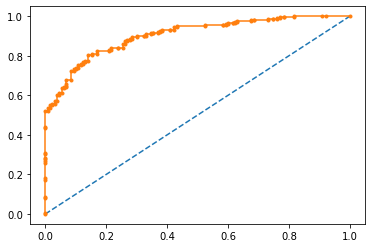

In [125]:
# predict probabilities
probs = gbcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
gbclT_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbclT_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
gbclT_fpr, gbclT_tpr, gbclT_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbclT_fpr, gbclT_tpr, marker='.')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458
 



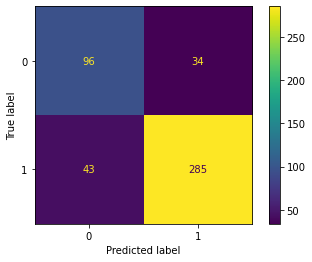

In [126]:
# Confusion matrix on the test data

plot_confusion_matrix(gbcl_model,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

ROC Curve on the Training data

AUC of LogisticRegression: 0.889
AUC of LinearDiscriminantAnalysis: 0.889
AUC of NaiveBayesClassifier: 0.886
AUC of KNeighborsClassifier: 0.921
AUC DecisionTreeClassifier: 1.000
AUC RandomForestClassifier: 1.000
AUC of BaggingClassifier: 1.000
AUC of AdaBoostClassifier: 0.913
AUC of GradientBoostingClassifier: 0.950


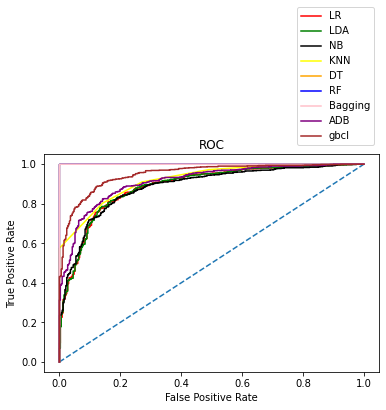

In [127]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_fpr, LR_tpr,color='red',label="LR")
print('AUC of LogisticRegression: %.3f' % LR_auc)
plt.plot(LDA_fpr,LDA_tpr,color='green',label="LDA")
print('AUC of LinearDiscriminantAnalysis: %.3f' % LDA_auc)
plt.plot(NBM_fpr,NBM_tpr,color='black',label="NB")
print('AUC of NaiveBayesClassifier: %.3f' % NBM_auc)
plt.plot(KNN_fpr,KNN_tpr,color='yellow',label="KNN")
print('AUC of KNeighborsClassifier: %.3f' % KNN_auc)
plt.plot(DT_fpr,DT_tpr,color='orange',label="DT")
print('AUC DecisionTreeClassifier: %.3f' % DT_auc)
plt.plot(RF_fpr,RF_tpr,color='blue',label="RF")
print('AUC RandomForestClassifier: %.3f' % RF_auc)
plt.plot(Bagging_fpr,Bagging_tpr,color='pink',label="Bagging")
print('AUC of BaggingClassifier: %.3f' % Bagging_auc)
plt.plot(ADB_fpr,ADB_tpr,color='purple',label="ADB")
print('AUC of AdaBoostClassifier: %.3f' % ADB_auc)
plt.plot(gbcl_fpr,gbcl_tpr,color='brown',label="gbcl")
print('AUC of GradientBoostingClassifier: %.3f' % gbcl_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve on the Test data

AUC of LogisticRegression: 0.882
AUC of LinearDiscriminantAnalysis: 0.884
AUC of NaiveBayesClassifier: 0.885
AUC of KNeighborsClassifier: 0.835
AUC DecisionTreeClassifier: 0.723
AUC RandomForestClassifier: 0.887
AUC of BaggingClassifier: 0.877
AUC of AdaBoostClassifier: 0.879
AUC of GradientBoostingClassifier: 0.904


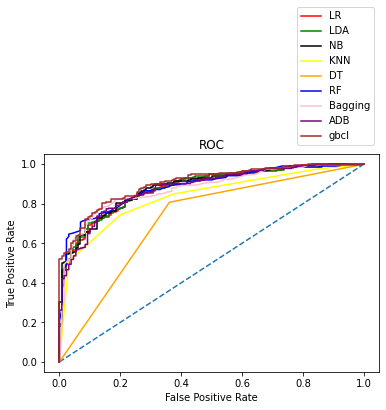

In [128]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LRT_fpr, LRT_tpr,color='red',label="LR")
print('AUC of LogisticRegression: %.3f' % LRT_auc)
plt.plot(LDAT_fpr,LDAT_tpr,color='green',label="LDA")
print('AUC of LinearDiscriminantAnalysis: %.3f' % LDAT_auc)
plt.plot(NBMT_fpr,NBMT_tpr,color='black',label="NB")
print('AUC of NaiveBayesClassifier: %.3f' % NBMT_auc)
plt.plot(KNNT_fpr,KNNT_tpr,color='yellow',label="KNN")
print('AUC of KNeighborsClassifier: %.3f' % KNNT_auc)
plt.plot(DTT_fpr,DTT_tpr,color='orange',label="DT")
print('AUC DecisionTreeClassifier: %.3f' % DTT_auc)
plt.plot(RFT_fpr,RFT_tpr,color='blue',label="RF")
print('AUC RandomForestClassifier: %.3f' % RFT_auc)
plt.plot(BaggingT_fpr,BaggingT_tpr,color='pink',label="Bagging")
print('AUC of BaggingClassifier: %.3f' % BaggingT_auc)
plt.plot(ADBT_fpr,ADBT_tpr,color='purple',label="ADB")
print('AUC of AdaBoostClassifier: %.3f' % ADBT_auc)
plt.plot(gbclT_fpr,gbclT_tpr,color='brown',label="gbcl")
print('AUC of GradientBoostingClassifier: %.3f' % gbclT_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

From the above model which have performed well on train data set, and also have not well performed on test data set. However Decision Tree, Random Forest, Bagging which had a 100% score on the train data set have shown a not well result on the test data set. The decision tree shows not good performance on the test data.

# 1.8 Based on these predictions, what are the insights?

The AUC and ROC curves appear similar on train and test data set.

And the accuracy of allthe models is similar to each other on train and test data set.

The model score of all the models for train and test data is similar and close to each other score.

The F1 score of all the models for train and test data are almost similar.

The Model tuning gives better results, but bagging and random forest perform well on both train and test data.

From the above summary of the confusion matrix, we can see that the actual and the predicted data are very close to each other. This is the reflection of the right fit model.

Boosting technique shows good performance.

But the decision tree shows not good performance on the test data.

Based on Overall performance of all the models, we can come to a conclusion that there is no overfitting and nor underfitting issues in this case.